In [3]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json

import sys
sys.path.append('../../py/')

from cosmoSim import cosmoSim

In [4]:
matplotlib.rc('xtick', labelsize=24)
matplotlib.rc('ytick', labelsize=24)
matplotlib.rcParams['font.size']=24

ALPHA=0.6
FIGSIZE=[24,12]
DPI=300

snap_no = 3

In [5]:
outpath = '../../plots/plots_L3N256_resolution/'

try:
    os.mkdir(outpath)
except:
    print(f'{outpath} already exists!')

colors = [
    'r',
    'b',
    'g',
    'tab:purple'
]

CDM_runs = [
    'run_CDM_L3N128_DM',
    'run_CDM_L3N256_DM',
    'run_CDM_L3N512_DM'
    ]
tcDM_runs = [
    'run_2cDM_L3N128_DM_power00_sigma1',
    'run_2cDM_L3N256_DM_power00_sigma1',
    'run_2cDM_L3N512_DM_power00_sigma1',

]
ratio_colors = [
    'b',
    'g',
    'tab:purple'
]

runs = [val for pair in zip(CDM_runs, tcDM_runs) for val in pair]

In [6]:
def wnumber2wlength(k):
    return 1/k
def wlength2wnumber(l):
    return 1/l    

FileNotFoundError: ../../data_prods/run_CDM_L3N128_DM/mass_profile_3.txt not found.

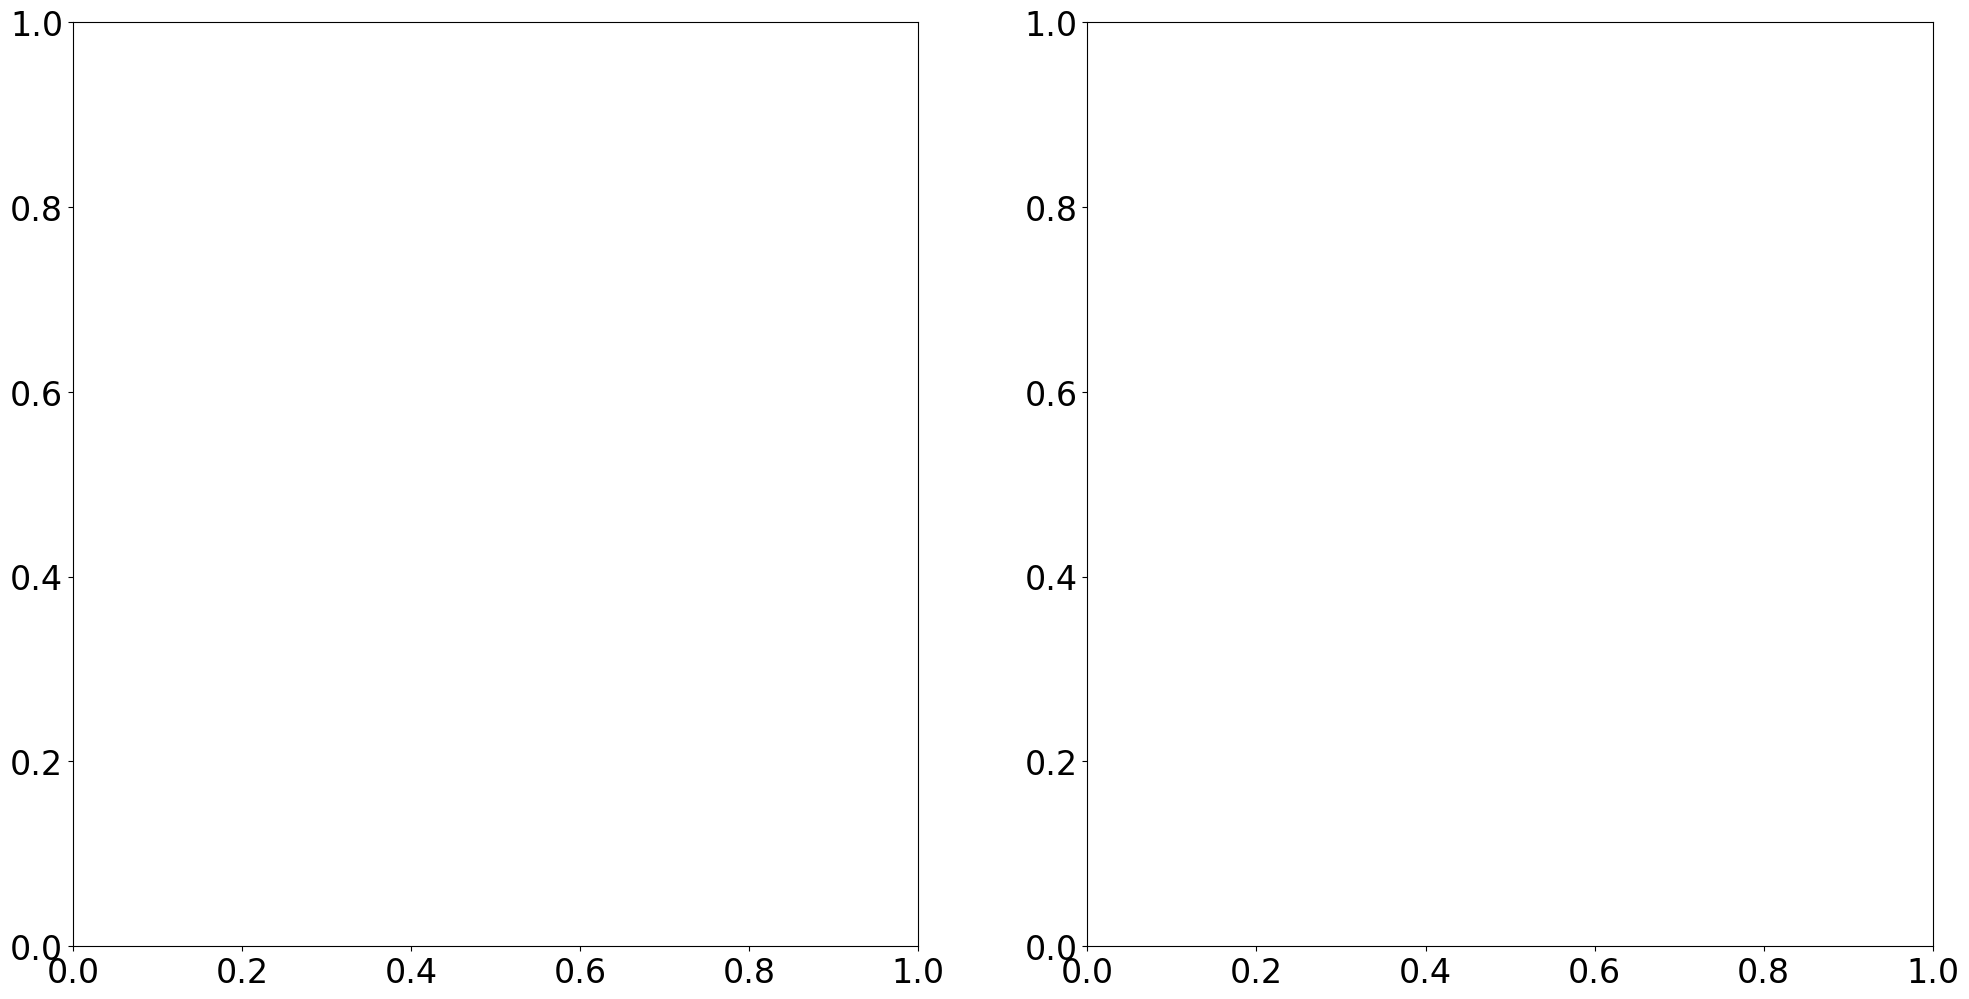

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

for i, run_n in enumerate(runs):

    run = cosmoSim(run_n)

    mbins, m = run.load_mass_profile(run.redshifts[snap_no])
    vbins, v = run.load_vel_profile(run.redshifts[snap_no])
    if run.dm_type == 'CDM':
        ax[0].plot(mbins, m, '--', color=colors[i//2], alpha=ALPHA)
        ax[1].plot(vbins, v, '--', color=colors[i//2], alpha=ALPHA)
    else:
        ax[0].plot(mbins, m, label=f'{run.npart}', color=colors[i//2], alpha=ALPHA)
        ax[1].plot(vbins, v, label=f'{run.npart}', color=colors[i//2], alpha=ALPHA)

ax[0].set_xlabel("Halo Mass ($M_{\odot}$)")
ax[0].set_ylabel("$N\\left(>M\\right)$")
ax[0].set_title("Halo Mass Function")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax[1].plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)
ax[1].plot([],[], '--', label='CDM', color='k')
ax[1].plot([],[], label='2cDM power (0,0) $\sigma_{0}$ = 1', color='k')
ax[1].set_xlabel("$V_{max}$ [km s$^{-1}$]")
ax[1].set_ylabel("$N\\left(>V\\right)$")
ax[1].set_title('Halo $V_{max}$ Function')

ax[1].legend()

for a in ax:
    a.set_yscale("log")
    a.set_xscale("log")
    a.grid(True, which="both", ls="-")


fig.tight_layout()
plt.savefig(outpath + f'z_{run.redshifts[snap_no]}_both_profiles.png', dpi=DPI)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '../../data_prods/run_2cDM_L3N128_DM_power00_sigma1/run_info.json'

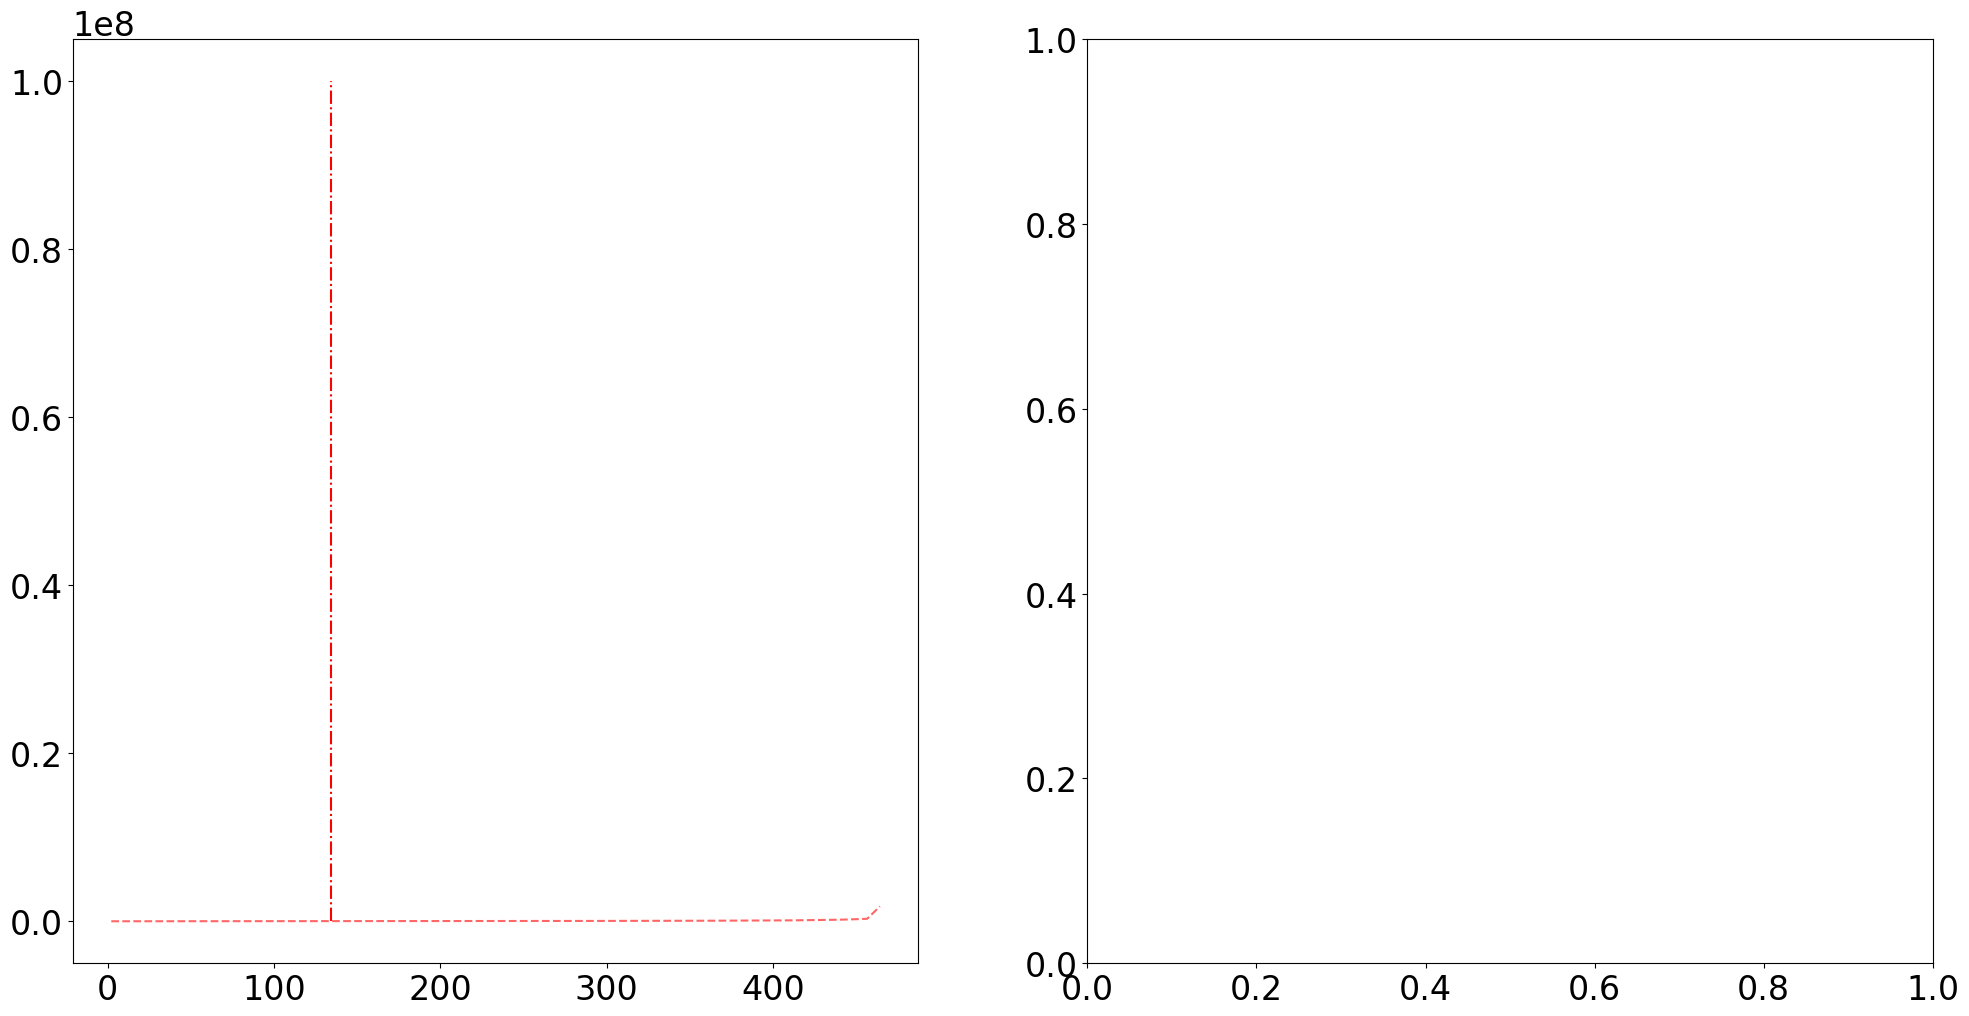

In [11]:
fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

for i, run_n in enumerate(runs):

    run = cosmoSim(run_n)

    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])

    if run.dm_type == 'CDM':
        ax[0].plot(bins, dk, '--', color=colors[i//2], alpha=ALPHA)
    else:
        ax[0].plot(bins, dk, color=colors[i//2], alpha=ALPHA)

    ax[0].vlines(k_ny, 10**0, 10**8, colors=colors[i//2], linestyles='dashdot')

    if run.baryon_type == 'DM':
        continue
    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no], part_type='by')

    if run.dm_type == 'CDM':
        ax[1].plot(bins, dk, '--', color=colors[i//2], alpha=ALPHA)
    else:
        ax[1].plot(bins, dk, label=f'{run.npart}', color=colors[i//2], alpha=ALPHA)

    ax[1].vlines(k_ny, 10**0, 10**8, colors=colors[i//2], linestyles='dashdot')


for a in ax:
    a.set_xlabel('k [$h$ Mpc$^{-1}$]')
    a.set_ylabel('$\Delta^{2}(k)$')
    a.set_xscale('log')
    a.set_yscale('log')
    a.set_xlim(10**0, 10**3)
    a.set_ylim(10**0, 10**7 + 2*10**7)
    sax = a.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
    sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
    a.grid(True, which="both", ls="-")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax[1].plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)
ax[1].plot([],[], '--', label='CDM', color='k')
ax[1].plot([],[], label='2cDM power (0,0) $\sigma_{0}$ = 1', color='k')

ax[0].set_title('DM Density')
ax[1].set_title('Baryon Density')

ax[1].legend()

fname = f'z_{run.redshifts[snap_no]}_Spectra_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()

/tmp/ipykernel_28041/2174059925.py:4: RuntimeWarning: divide by zero encountered in divide
  return 1/l


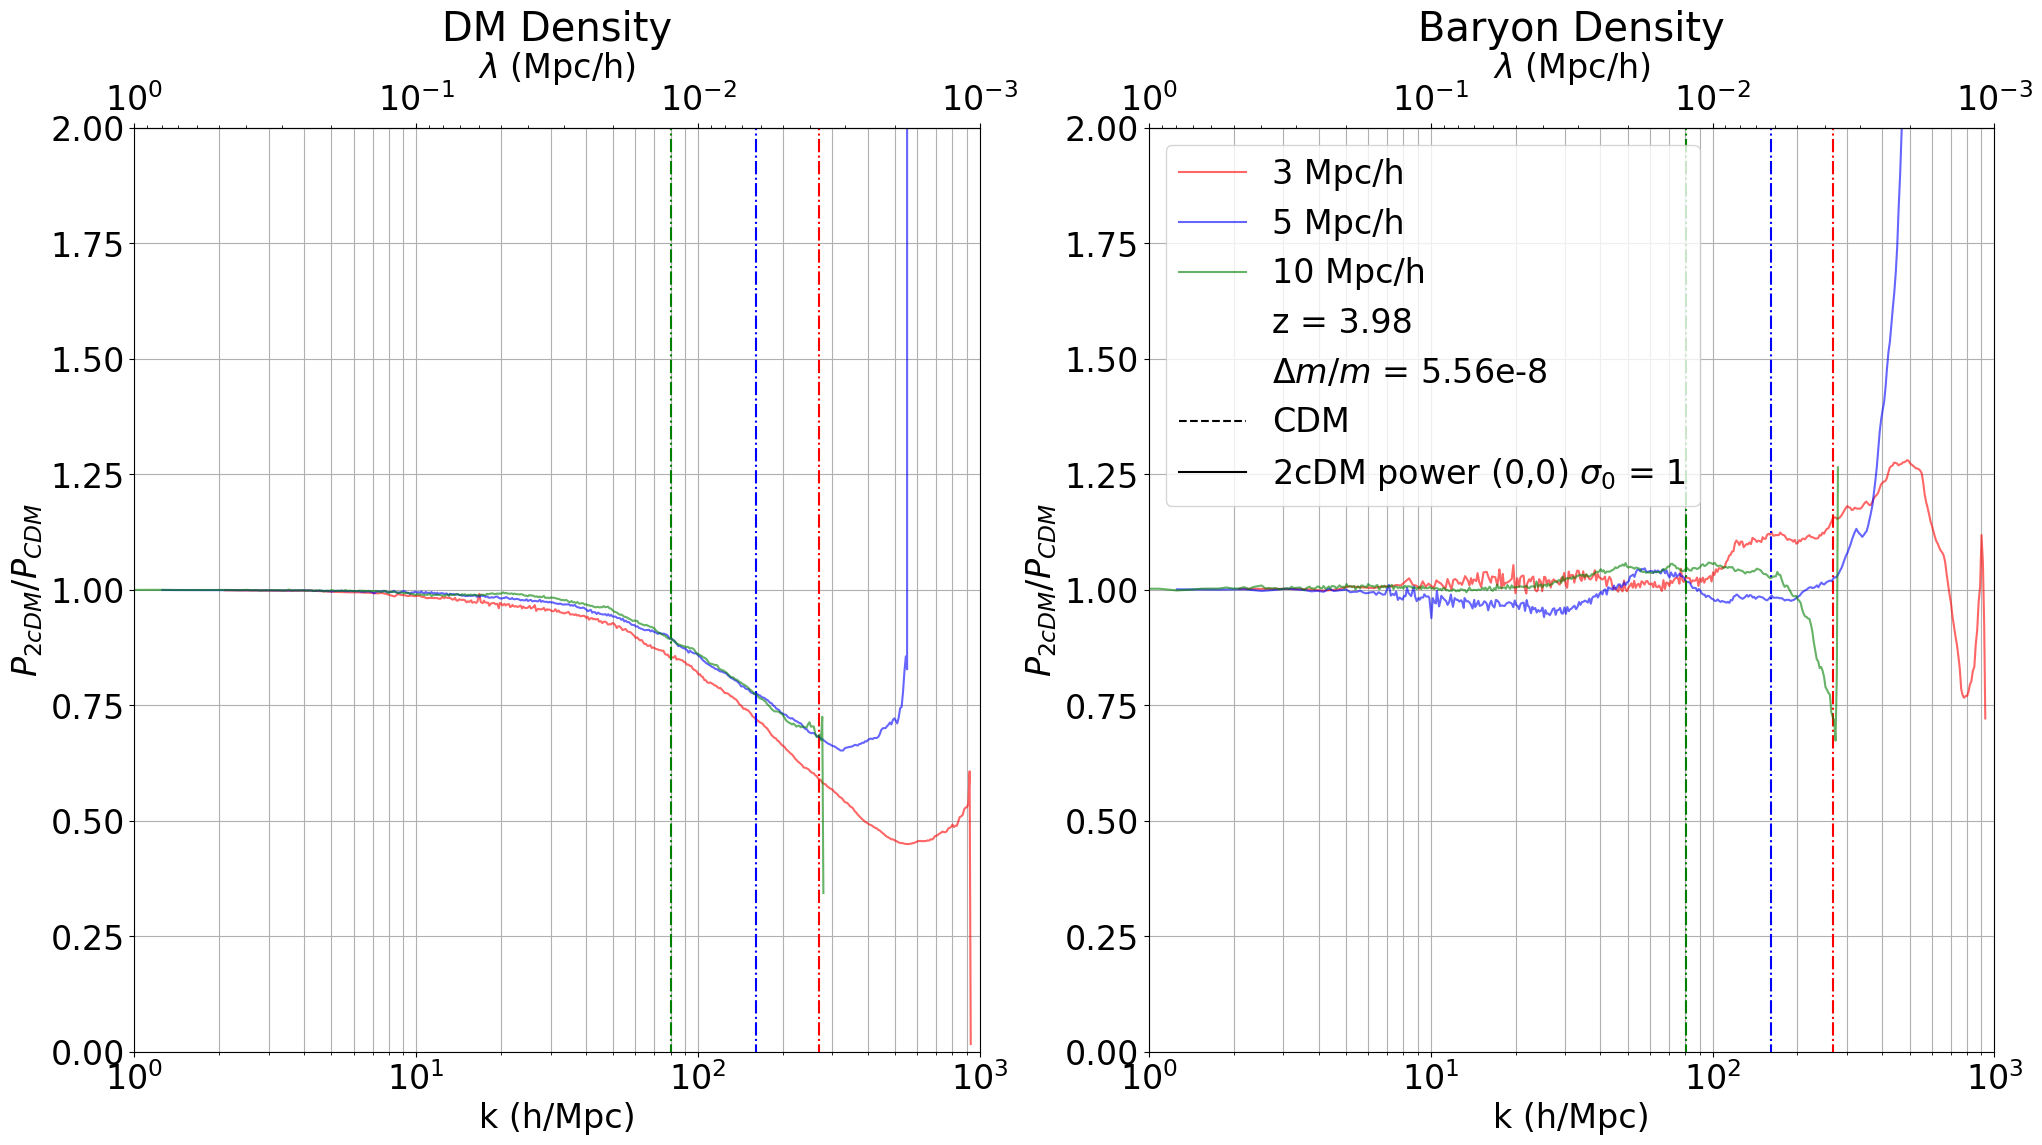

In [106]:
fig, ax = plt.subplots(1, 2, figsize=FIGSIZE)

for i, run_n in enumerate(tcDM_runs):

    run = cosmoSim(run_n)

    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no])

    cdm_run = cosmoSim(CDM_runs[i])
    cbins, cpk, cdk, ck_ny = cdm_run.load_power_spectra(run.redshifts[snap_no])
    ax[0].plot(bins, pk/cpk, color=colors[i], alpha=ALPHA)

    ax[0].vlines(k_ny, -3, 3, colors=colors[i], linestyles='dashdot')
    
    bins, pk, dk, k_ny = run.load_power_spectra(run.redshifts[snap_no], part_type='by')
    cbins, cpk, cdk, ck_ny = cdm_run.load_power_spectra(run.redshifts[snap_no], part_type='by')
    ax[1].plot(bins, pk/cpk, label=f'{run.boxsize // 1000} Mpc/h', color=colors[i], alpha=ALPHA)
    ax[1].vlines(k_ny, -3, 3, colors=colors[i], linestyles='dashdot')



for a in ax:
    a.set_xlabel('k [$h$ Mpc$^{-1}$]')
    a.set_ylabel('$P_{2cDM}/P_{CDM}$')
    a.set_xscale('log')
    a.set_xlim(10**0, 10**3)
    a.set_ylim(0, 2.0)
    sax = a.secondary_xaxis('top', functions=(wnumber2wlength, wlength2wnumber))
    sax.set_xlabel('$\lambda$ [Mpc $h^{-1}$]')
    a.grid(True, which="both", ls="-")

ax[1].plot([],[], label='z = {}'.format(run.redshifts[snap_no]), alpha=0)
ax[1].plot([],[], label='$V_{kick}$ = 100 [km s$^{-1}$]', alpha=0)
ax[1].plot([],[], '--', label='CDM', color='k')
ax[1].plot([],[], label='2cDM power (0,0) $\sigma_{0}$ = 1', color='k')

ax[0].set_title('DM Density')
ax[1].set_title('Baryon Density')

ax[1].legend()

fname = f'z_{run.redshifts[snap_no]}_ratio_256.png'
plt.savefig(outpath+fname, dpi=DPI)
plt.show()